<a href="https://colab.research.google.com/github/ElijahYohanceSilang/CPE-313/blob/main/HOA_2.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Activity 1.2 : Training Neural Networks


In [66]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Objective(s):

This activity aims to demonstrate how to train neural networks using keras

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural networks
* Demonstrate how to evaluate and plot the model using training and validation loss


#### Resources:
* Jupyter Notebook

CI Pima Diabetes Dataset

* pima-indians-diabetes.csv


#### Procedures

Load the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

%matplotlib inline

In [2]:
## Import Keras objects for Deep Learning

from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop

Load the dataset

In [3]:

filepath = "/content/drive/MyDrive/CPE_DATASCI/pima-indians-diabetes.csv"
names = ["times_pregnant", "glucose_tolerance_test", "blood_pressure", "skin_thickness", "insulin",
         "bmi", "pedigree_function", "age", "has_diabetes"]
diabetes_df = pd.read_csv(filepath, names=names)

Check the top 5 samples of the data

In [4]:

print(diabetes_df.shape)
diabetes_df.sample(5)

(768, 9)


,times_pregnant,glucose_tolerance_test,blood_pressure,skin_thickness,insulin,bmi,pedigree_function,age,has_diabetes
757,0,123,72,0,0,36.3,0.258,52,1
163,2,100,64,23,0,29.7,0.368,21,0
296,2,146,70,38,360,28.0,0.337,29,1
352,3,61,82,28,0,34.4,0.243,46,0
579,2,197,70,99,0,34.7,0.575,62,1


In [5]:
diabetes_df.dtypes

,0
times_pregnant,int64
glucose_tolerance_test,int64
blood_pressure,int64
skin_thickness,int64
insulin,int64
bmi,float64
pedigree_function,float64
age,int64
has_diabetes,int64


In [6]:
X = diabetes_df.iloc[:, :-1].values
y = diabetes_df["has_diabetes"].values

Split the data to Train, and Test (75%, 25%)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)

In [8]:
np.mean(y), np.mean(1-y)

(np.float64(0.3489583333333333), np.float64(0.6510416666666666))

Build a single hidden layer neural network using 12 nodes.
Use the sequential model with single layer network and input shape to 8.



Normalize the data

In [9]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

Define the model:
* Input size is 8-dimensional
* 1 hidden layer, 12 hidden nodes, sigmoid activation
* Final layer with one node and sigmoid activation (standard for binary classification)

In [10]:


model  = Sequential([
    Dense(12, input_shape=(8,), activation="relu"),
    Dense(1, activation="sigmoid")
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


View the model summary

In [11]:

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 12)             │           108 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121 (484.00 B)

 Trainable params: 121 (484.00 B)

 Non-trainable params: 0 (0.00 B)

Train the model
* Compile the model with optimizer, loss function and metrics
* Use the fit function to return the run history.


In [12]:
model.compile(SGD(learning_rate = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=200)



Epoch 1/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.3466 - loss: 0.9380 - val_accuracy: 0.3698 - val_loss: 0.8975
Epoch 2/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.3838 - loss: 0.8939 - val_accuracy: 0.3854 - val_loss: 0.8791
Epoch 3/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.3889 - loss: 0.8486 - val_accuracy: 0.3958 - val_loss: 0.8621
Epoch 4/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.3957 - loss: 0.8621 - val_accuracy: 0.4115 - val_loss: 0.8464
Epoch 5/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.4001 - loss: 0.8601 - val_accuracy: 0.4115 - val_loss: 0.8318
Epoch 6/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.4011 - loss: 0.8275 - val_accuracy: 0.4167 - val_loss: 0.8182
Epoch 7/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.4217 - loss: 0.8141 - val_accuracy: 0.4479 - val_loss: 0.8056
Epoch 8/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.4387 - loss: 0.7922 - val_accuracy: 0.

In [25]:
## Like we did for the Random Forest, we generate two kinds of predictions
#  One is a hard decision, the other is a probabilitistic score.

y_pred_class_nn_1 = model.predict(X_test_norm)
y_pred_prob_nn_1 = model.predict(X_test_norm)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [26]:
# Let's check out the outputs to get a feel for how keras apis work.
y_pred_class_nn_1[:10]

array([[0.53706896],
       [0.6842988 ],
       [0.43188155],
       [0.48812893],
       [0.19411269],
       [0.42806974],
       [0.04271488],
       [0.42416838],
       [0.6705574 ],
       [0.19641413]], dtype=float32)

In [27]:
y_pred_prob_nn_1[:10]

array([[0.53706896],
       [0.6842988 ],
       [0.43188155],
       [0.48812893],
       [0.19411269],
       [0.42806974],
       [0.04271488],
       [0.42416838],
       [0.6705574 ],
       [0.19641413]], dtype=float32)

Create the plot_roc function

In [28]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])



Evaluate the model performance and plot the ROC CURVE

In [32]:
y_pred_class_nn_1 = y_pred_class_nn_1.astype('int32')
y_pred_prob_nn_1 = y_pred_prob_nn_1.astype('int32')

accuracy is 0.641
roc-auc is 0.500


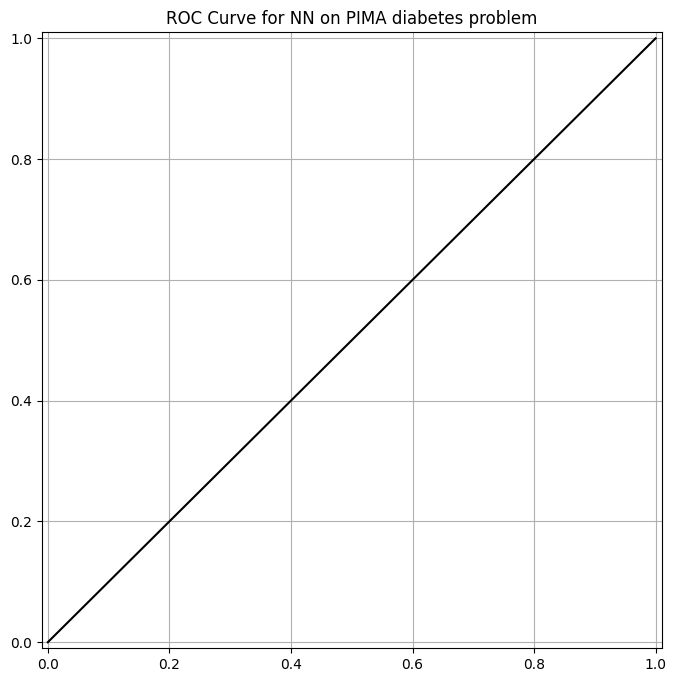

In [33]:

print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

plot_roc(y_test, y_pred_prob_nn_1, 'NN')

 Plot the training loss and the validation loss over the different epochs and see how it looks

In [19]:
run_hist_1.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

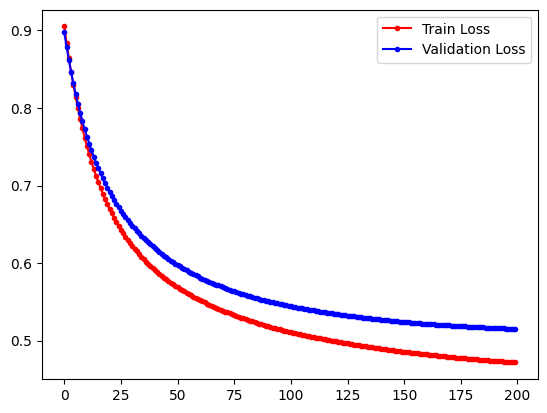

In [20]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

What is your interpretation about the result of the train and validation loss?

Both loss from different department seem to drop together, but as epoch increases, the more gap they have on each other.

#type your answer here

#### Supplementary Activity

* Build a model with two hidden layers, each with 6 nodes
* Use the "relu" activation function for the hidden layers, and "sigmoid" for the final layer
* Use a learning rate of .003 and train for 1500 epochs
* Graph the trajectory of the loss functions, accuracy on both train and test set
* Plot the roc curve for the predictions
* Use different learning rates, numbers of epochs, and network structures.
* Plot the results of training and validation loss using different learning rates, number of epocgs and network structures
* Interpret your result

In [34]:
model  = Sequential([
    Dense(6, input_shape=(8,), activation="relu"),
    Dense(6, input_shape=(8,), activation="relu"),
    Dense(1, activation="sigmoid")
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
model.compile(SGD(learning_rate = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=1500)

Epoch 1/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.4588 - loss: 0.7417 - val_accuracy: 0.4583 - val_loss: 0.7508
Epoch 2/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4399 - loss: 0.7575 - val_accuracy: 0.4635 - val_loss: 0.7443
Epoch 3/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4617 - loss: 0.7396 - val_accuracy: 0.4896 - val_loss: 0.7384
Epoch 4/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4457 - loss: 0.7512 - val_accuracy: 0.5052 - val_loss: 0.7331
Epoch 5/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4651 - loss: 0.7180 - val_accuracy: 0.4948 - val_loss: 0.7284
Epoch 6/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4656 - loss: 0.7241 - val_accuracy: 0.4896 - val_loss: 0.7240
Epoch 7/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4828 - loss: 0.7194 - val_accuracy: 0.5104 - val_loss: 0.7201
Epoch 8/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5146 - loss: 0.7191 - val_accuracy: 

In [36]:
y_pred_class_nn_1 = model.predict(X_test_norm)
y_pred_prob_nn_1 = model.predict(X_test_norm)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [37]:
y_pred_class_nn_1 = y_pred_class_nn_1.astype('int32')
y_pred_prob_nn_1 = y_pred_prob_nn_1.astype('int32')

In [38]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])

accuracy is 0.641
roc-auc is 0.500


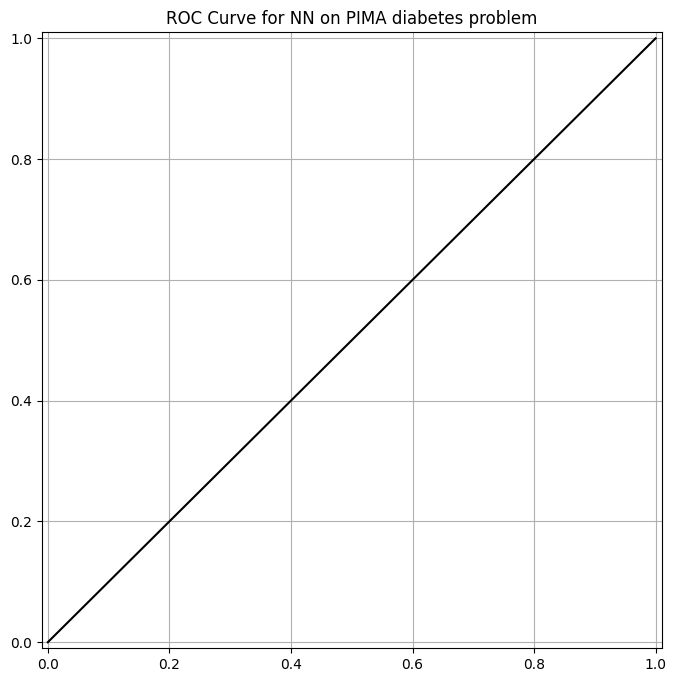

In [19]:

print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

plot_roc(y_test, y_pred_prob_nn_1, 'NN')

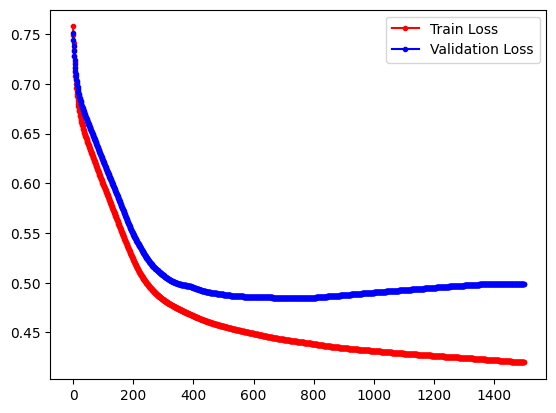

In [39]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

It looks like both train and validation loss got consistent on each other until 200 epochs.

##Different values


In [75]:
dif_model  = Sequential([
    Dense(8, input_shape=(8,), activation="relu"),
    Dropout(0.3),
    Dense(4, activation="relu"),
    Dropout(0.3),
    Dense(1, activation="sigmoid")
])

dif_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
dif_run_hist_1 = dif_model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=1000)

Epoch 1/1000


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.4315 - loss: 0.8361 - val_accuracy: 0.4323 - val_loss: 0.7262
Epoch 2/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5010 - loss: 0.7693 - val_accuracy: 0.4792 - val_loss: 0.7041
Epoch 3/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5166 - loss: 0.7467 - val_accuracy: 0.5365 - val_loss: 0.6895
Epoch 4/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5284 - loss: 0.7329 - val_accuracy: 0.6146 - val_loss: 0.6790
Epoch 5/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5991 - loss: 0.7103 - val_accuracy: 0.6562 - val_loss: 0.6698
Epoch 6/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5638 - loss: 0.7030 - val_accuracy: 0.6823 - val_loss: 0.6621
Epoch 7/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6759 - loss: 0.6770 - val_accuracy: 0.6771 - val_loss: 0.6560
Epoch 8/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6331 - loss: 0.6717 - val_accuracy: 0.6667 - val

In [77]:
dif_y_pred_class_nn_1 = dif_model.predict(X_test_norm)
dif_y_pred_prob_nn_1 = dif_model.predict(X_test_norm)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [78]:
dif_y_pred_class_nn_1 = dif_y_pred_class_nn_1.astype('int32')
dif_y_pred_prob_nn_1 = dif_y_pred_prob_nn_1.astype('int32')

accuracy is 0.641
roc-auc is 0.500


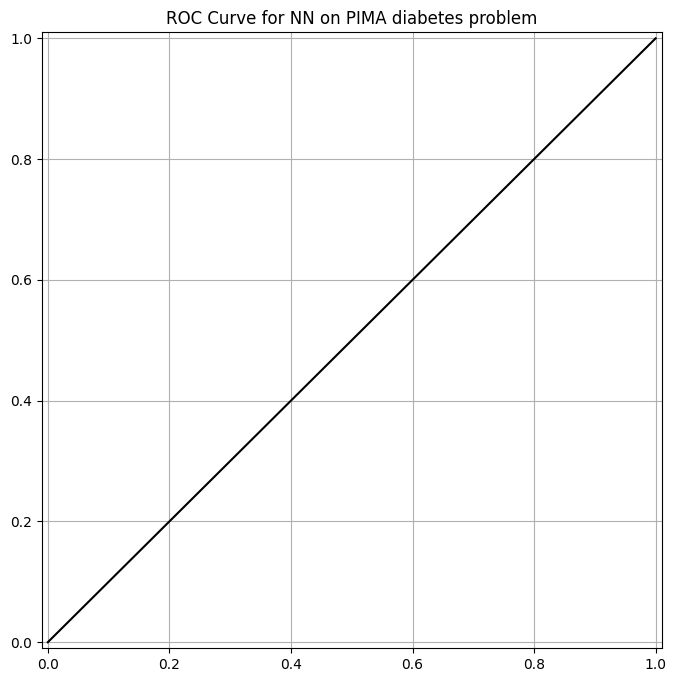

In [73]:
print('accuracy is {:.3f}'.format(accuracy_score(y_test,dif_y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,dif_y_pred_prob_nn_1)))

plot_roc(y_test, dif_y_pred_prob_nn_1, 'NN')

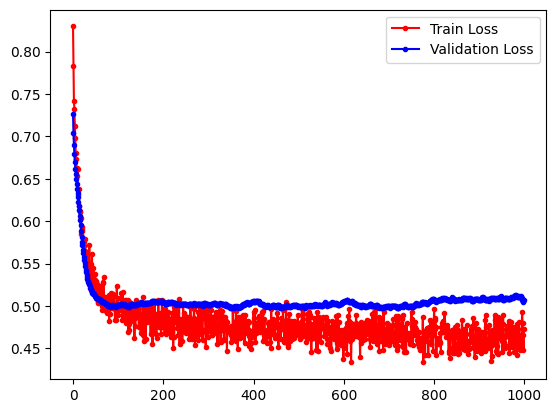

In [79]:
fig, ax = plt.subplots()
ax.plot(dif_run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(dif_run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

The plot seemed that train loss was inconsistent with its values but the validation loss was managed to settle, though it still rises a bit.

#### Conclusion

In this activity, I still have not grasp the best management in assigning values to the paramenters according to the plot above. There is still room to improve and much more for that. This activity has at least let me experience the playing with hidden layers. Parts of it were fun because I am like experimenting values and hoping for a good result. Pretty much of how a scientist do their work, but in my case I do not know yet how it works and I was just mixing things and hoping the results would be the powerpuff girls (the best result).

#type your answer here